# **Case Study for Statistical Method**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.multivariate.manova as manova
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

At a certain restuarent the expected distribution is 50% vegetarian and 50% non-vegetarian.
It is to be tested that the sample data matches this distribution or not.

## 1. Chi-Squared Test

In [3]:
from scipy.stats import chisquare

# Hypothetical observed frequencies
observed_frequencies = np.array([30, 70])  # e.g., 30 vegetarian and 70 non-vegetarian meals

# Expected frequencies (assuming a 50-50 distribution)
total_meals = observed_frequencies.sum()
expected_frequencies = np.array([total_meals * 0.5, total_meals * 0.5])

# Perform the Chi-Squared test
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Output the results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# print results with if else conditions
if p_value < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistic: 16.0
P-value: 6.334248366623988e-05
Reject null hypothesis, there is a significant difference between the groups


- Chi-squared contigency test

In [4]:
from scipy.stats import chi2_contingency

# data load
df= sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# creata a contigency table
contigency_table = pd.crosstab(df['sex'], df['smoker'])
contigency_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [8]:
# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contigency_table)

# output results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

# print the results based on if else conditions
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected: 
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]
Fail to reject null hypothesis, there is no significant difference between the groups 


---
## 2. t-Test

### One-sample t-Test

In [14]:
# data load
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

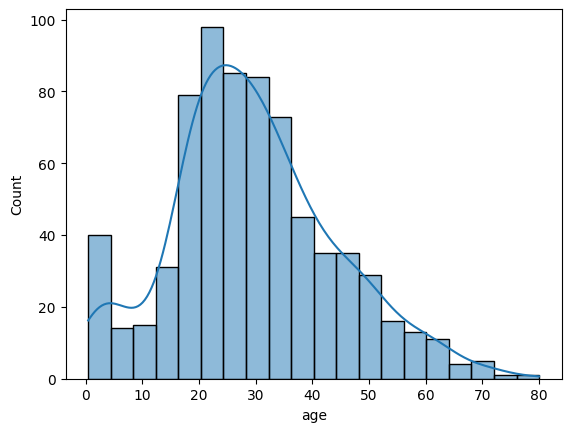

In [15]:
sns.histplot(df['age'], kde=True)

In [16]:
# shapiro wilk test to check the normality of data
statistics, p = stats.shapiro(df['age'])

# print the results
print(f"Statistics: {statistics}")
print(f"P-value: {p}")

# print the results based on if else conditions
if p < 0.05:
    print("Reject null hypothesis, data is not normal")
else:
    print("Fail to reject null hypothesis, data is normal")

Statistics: nan
P-value: nan
Fail to reject null hypothesis, data is normal


mu = 35

is there any difference between people ages and mu?

In [18]:
# impute null values with median
df['age'] = df['age'].fillna(df['age'].median())
# also for fare
df['fare'] = df['fare'].fillna(df['fare'].median())

In [22]:
statistic, p = stats.ttest_1samp(df['age'], 35)

# print the results
print(f"Statistic: {statistic}")
print(f"P-value: {p}")

# print the results based on if else conditions
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Statistic: -12.92692474991228
P-value: 3.724326416969065e-35
Reject null hypothesis, there is a significant difference between the groups


###  Two-sample independent t-Test

In [24]:
# two sample t-test on ages of male and female in titanic
age_male = df[df['sex'] == 'male']['age']
age_female = df[df['sex'] == 'female']['age']
statistic, p = stats.ttest_ind(age_male, age_female)

# print the results
print(f"Statistic: {statistic}")
print(f"P-value: {p}")

# print the results based on if else conditions
if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Statistic: 2.4279606481426024
P-value: 0.015381536989875317
Reject null hypothesis, there is a significant difference between the groups


---
## **3. ANOVA**

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- **One-way ANOVA**

There is a difference between first, second and third class passengers?\
H0 : No difference\
H1 : There is a significant difference

In [34]:
# ANOVA for age and class using stats model
model = ols('age ~ pclass', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print('--------------------------')
# print the results based on if else conditions
if p < 0.05:
    print(f"Reject null hypothesis, because p value: {anova_table['PR(>F)']} so, there is a significant difference between the groups")
else:
    print(f"Fail to reject null hypothesis, because p value: {anova_table['PR(>F)']} so, there is no significant difference between the groups ")

                 sum_sq     df           F        PR(>F)
pclass     17429.695048    1.0  116.122704  1.558883e-25
Residual  133436.428421  889.0         NaN           NaN
--------------------------
Reject null hypothesis, because p value: pclass      1.558883e-25
Residual             NaN
Name: PR(>F), dtype: float64 so, there is a significant difference between the groups


### PostHoc Test

In [38]:
# Tuckey HSD pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['age'], groups=df['pclass'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-7.0467,0.0,-9.9299,-4.1636,True
1,3,-10.8795,0.0,-13.226,-8.533,True
2,3,-3.8328,0.0009,-6.3169,-1.3486,True


<Axes: xlabel='pclass', ylabel='age'>

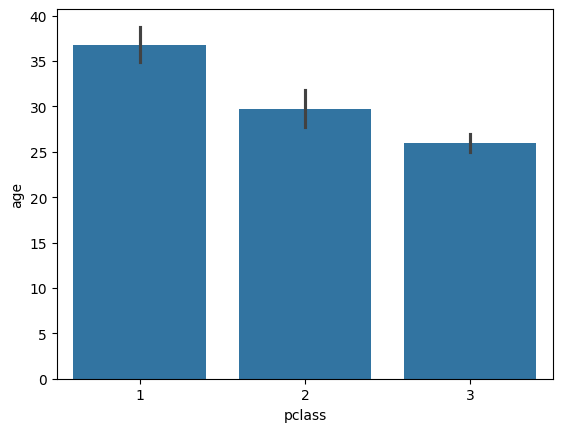

In [41]:
sns.barplot(x='pclass', y='age', data=df)

<Axes: xlabel='age', ylabel='Count'>

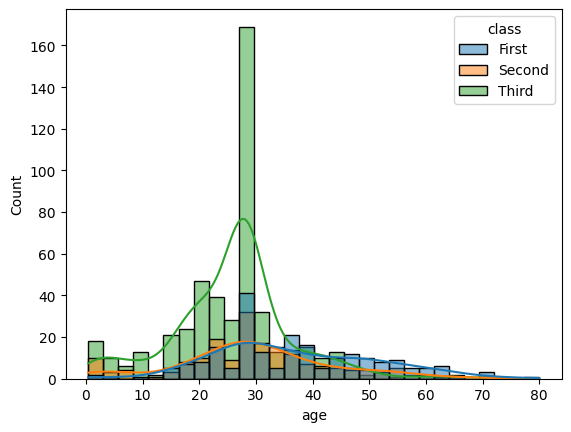

In [44]:
sns.histplot(df, x='age', kde=True, hue='class')

- **Two-way ANOVA**

In [47]:
# ANOVA for age and sex and who using stats model
model = ols('age ~ sex * who', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df             F        PR(>F)
sex                NaN    1.0           NaN           NaN
who       1.294561e-10    2.0  5.611466e-13  9.999994e-01
sex:who   5.233208e+04    2.0  2.268412e+02  8.119221e-46
Residual  1.023151e+05  887.0           NaN           NaN


c:\ProgramData\miniconda3\envs\eda\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\miniconda3\envs\eda\lib\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\ProgramData\miniconda3\envs\eda\lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


### PostHoc Test
Since p-values are significant so we perform PostHoc Test.

In [49]:
# Tuckey HSD pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df['age'], df['sex'] + df['who'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
femalechild,femalewoman,24.0084,0.0,19.4706,28.5462,True
femalechild,malechild,-1.7426,0.8815,-7.8152,4.3301,False
femalechild,maleman,24.7693,0.0,20.3881,29.1505,True
femalewoman,malechild,-25.751,0.0,-30.4333,-21.0686,True
femalewoman,maleman,0.7609,0.7773,-1.299,2.8207,False
malechild,maleman,26.5118,0.0,21.9811,31.0426,True


<Axes: xlabel='who', ylabel='age'>

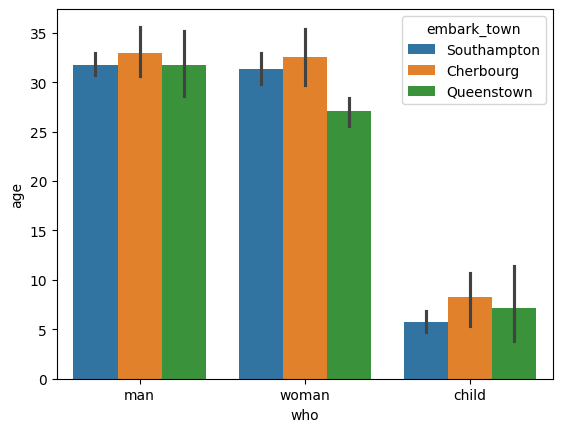

In [51]:
sns.barplot(df, x='who', y='age', hue='embark_town')

---
## **4. Correlation**

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

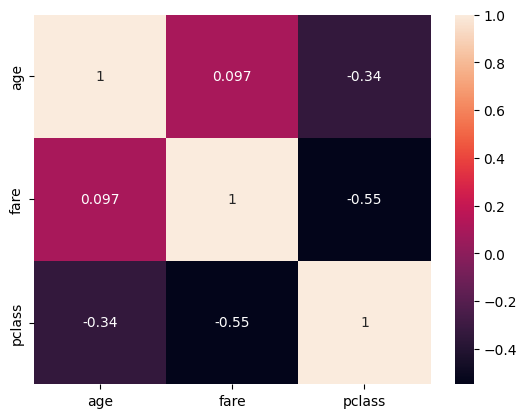

In [56]:
# create heatmap of correlation
sns.heatmap(df[['age', 'fare', 'pclass']].corr(), annot=True)

In [59]:
# correlation on tips dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

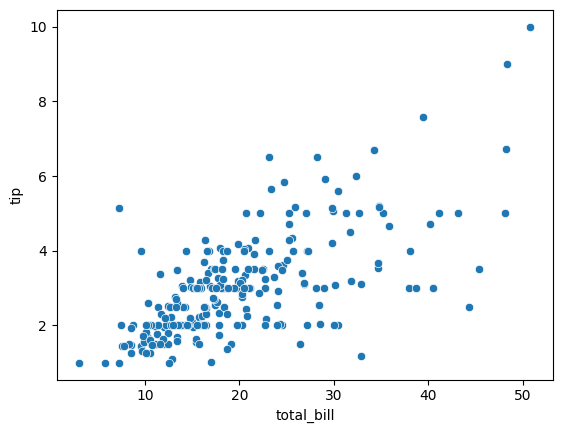

In [61]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

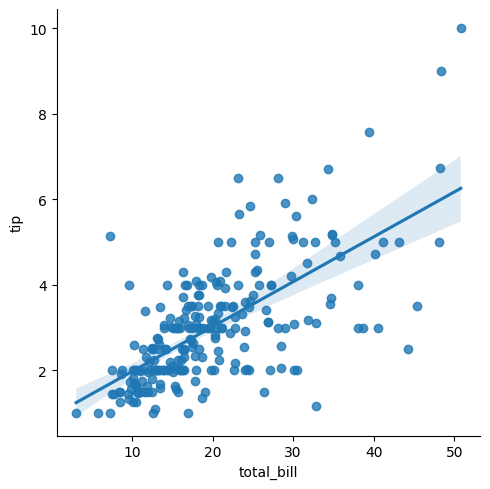

In [63]:
sns.lmplot(data=tips, x='total_bill', y='tip')

In [65]:
tips['total_bill'].corr(tips['tip'])

np.float64(0.6757341092113645)

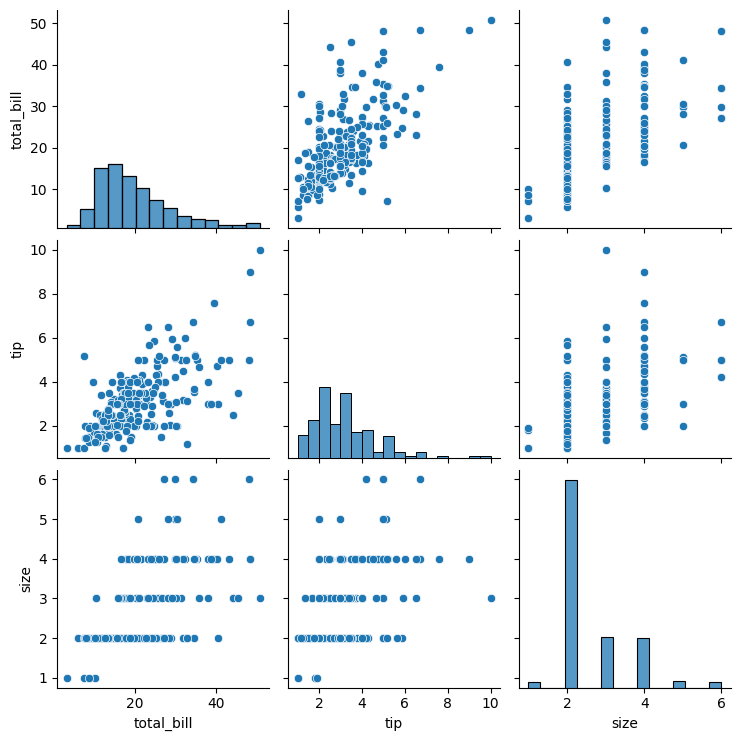

In [66]:
sns.pairplot(tips)

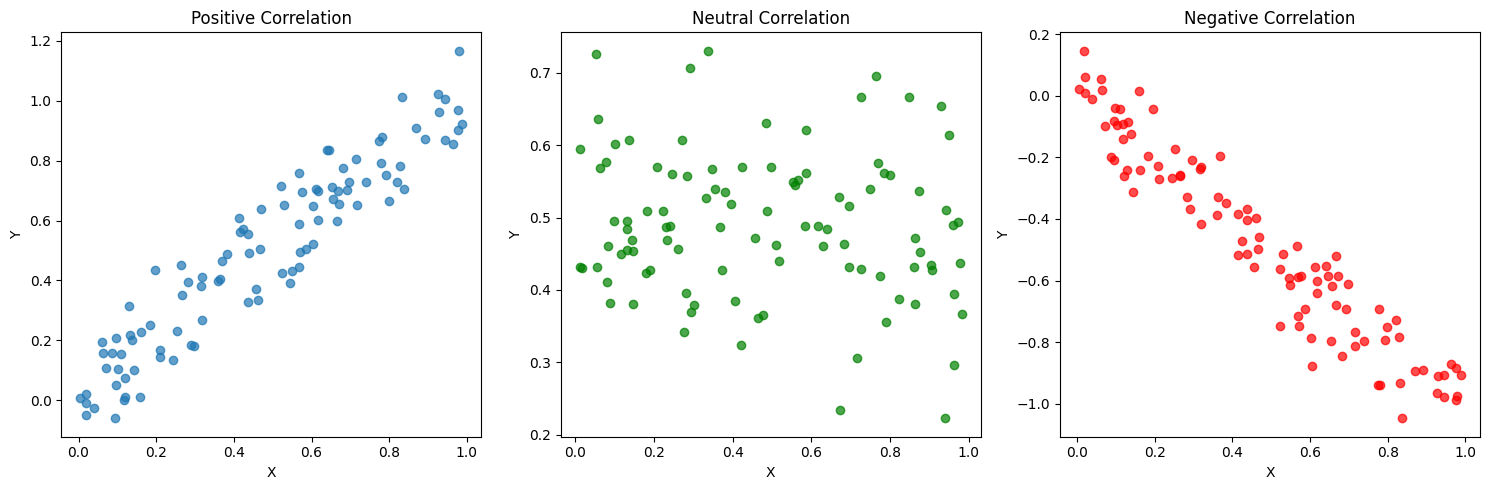

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
# Positive correlation
x = np.random.rand(100)
y_pos = x + np.random.normal(0, 0.1, 100)

# Neutral correlation
x_neutral = np.random.rand(100)
y_neutral = np.random.normal(0.5, 0.1, 100)

# Negative correlation
y_neg = -x + np.random.normal(0, 0.1, 100)

# Plotting the correlations
plt.figure(figsize=(15, 5))

# Positive Correlation
plt.subplot(1, 3, 1)
plt.scatter(x, y_pos, alpha=0.7)
plt.title('Positive Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Neutral Correlation
plt.subplot(1, 3, 2)
plt.scatter(x_neutral, y_neutral, alpha=0.7, color='green')
plt.title('Neutral Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Negative Correlation
plt.subplot(1, 3, 3)
plt.scatter(x, y_neg, alpha=0.7, color='red')
plt.title('Negative Correlation')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()